# EDA

##### Import libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import datetime
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

##### Load data

In [3]:
posts = pd.read_csv('../data/posts-preprocessed.csv') 

In [4]:
posts.head()

,author,created_utc,subreddit,timeframe,text_clean,sent_tokens,word_tokens
0,sub30605,1499390694,bulimia,pre-covid,chest anyone else experience chest purging kno...,['chest anyone else experience chest purging k...,"['chest', 'anyone', 'else', 'experience', 'che..."
1,sub27274,1499060654,bulimia,pre-covid,dying eat eating die study shifting coping men...,['dying eat eating die study shifting coping m...,"['dying', 'eat', 'eating', 'die', 'study', 'sh..."
2,sub6055,1499029087,bulimia,pre-covid,without purging way lose weight without exercise,['without purging way lose weight without exer...,"['without', 'purging', 'way', 'lose', 'weight'..."
3,sub40365,1498978259,bulimia,pre-covid,melancholy little month since slowly losing ha...,['melancholy little month since slowly losing ...,"['melancholy', 'little', 'month', 'since', 'sl..."
4,sub49857,1498814187,bulimia,pre-covid,relapsing upset right twice week good tired cy...,['relapsing upset right twice week good tired ...,"['relapsing', 'upset', 'right', 'twice', 'week..."


In [5]:
posts.shape

(84879, 7)

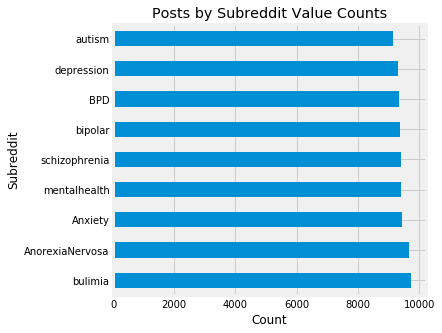

In [14]:
# Value counts of posts per subreddit
posts.subreddit.value_counts().plot(kind='barh', figsize=(5,5))
plt.title('Posts by Subreddit Value Counts')
plt.ylabel('Subreddit')
plt.xlabel('Count');

The posts collected for each subreddit, after cleaning and pre- processing, remain approximately even

In [4]:
posts['subreddit'].value_counts()

bulimia            9746
AnorexiaNervosa    9666
Anxiety            9442
mentalhealth       9422
schizophrenia      9405
bipolar            9389
BPD                9335
depression         9317
autism             9157
Name: subreddit, dtype: int64

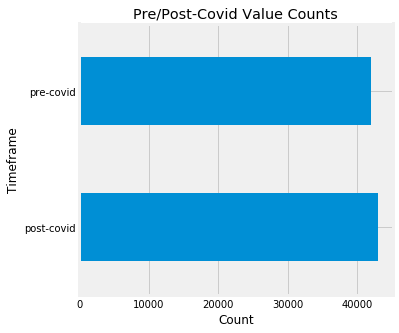

In [13]:
# Value counts for timeframe pre vs post covid
posts.timeframe.value_counts().plot(kind='barh', figsize=(5,5))
plt.title('Pre/Post-Covid Value Counts')
plt.ylabel('Timeframe')
plt.xlabel('Count');

We can see here our posts collected are roughly even from pre and post covid onset

In [6]:
posts['timeframe'].value_counts()

post-covid    42924
pre-covid     41955
Name: timeframe, dtype: int64

In [5]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84879 entries, 0 to 84878
Data columns (total 7 columns):
author         84879 non-null object
created_utc    84879 non-null int64
subreddit      84879 non-null object
timeframe      84879 non-null object
text_clean     84879 non-null object
sent_tokens    84879 non-null object
word_tokens    84879 non-null object
dtypes: int64(1), object(6)
memory usage: 4.5+ MB


### Submission Lengths

In [6]:
# Create a new column with submission length
posts['text_length'] = posts['text_clean'].map(len)

In [7]:
# Show the longest submissions
posts.sort_values(by='text_length', ascending=False).head()

,author,created_utc,subreddit,timeframe,text_clean,sent_tokens,word_tokens,text_length
20575,sub10566,1523054488,BPD,pre-covid,reciprocal suffering time please either read e...,['reciprocal suffering time please either read...,"['reciprocal', 'suffering', 'time', 'please', ...",18463
47884,sub28989,1585853811,AnorexiaNervosa,post-covid,rather fast recovery turn old year one want te...,['rather fast recovery turn old year one want ...,"['rather', 'fast', 'recovery', 'turn', 'old', ...",11019
84357,sub26398,1596187654,mentalhealth,post-covid,really long sad story begin tough think write ...,['really long sad story begin tough think writ...,"['really', 'long', 'sad', 'story', 'begin', 't...",10958
18476,sub8113,1560710792,schizophrenia,pre-covid,think may please help many read need advice kn...,['think may please help many read need advice ...,"['think', 'may', 'please', 'help', 'many', 're...",10937
81803,sub48040,1598532714,mentalhealth,post-covid,long remember really know happy like many damn...,['long remember really know happy like many da...,"['long', 'remember', 'really', 'know', 'happy'...",10875


### Distribution of submission lengths

Is there a difference between subreddit groups in text length?

In [8]:
posts.groupby('subreddit')['text_length'].mean()

subreddit
AnorexiaNervosa    304.459859
Anxiety            398.853103
BPD                472.454312
autism             232.360598
bipolar            295.505592
bulimia            311.594500
depression         396.272727
mentalhealth       505.343239
schizophrenia      284.537693
Name: text_length, dtype: float64

Overall what is the distribution of the lengths of sub-Reddit posts?

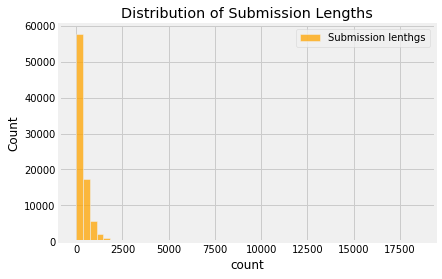

In [9]:
sns.histplot(posts['text_length'], color = 'orange', label="Submission lenthgs",bins=50)
plt.xlabel("count")
plt.title("Distribution of Submission Lengths")
plt.legend();


The distribution of submission length is very skewed, showing us most submissions are fairly short (a median of 227 words). It looks like some posts are much longer but hard to tell in this plot, so we will look at a box plot below.

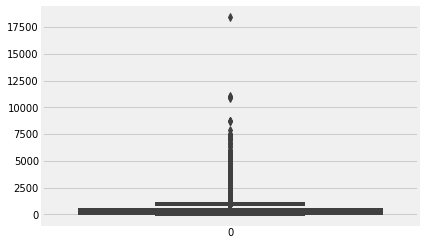

In [10]:
sns.boxplot(data = posts['text_length']);

From the box plot we can see there are a few outliers of very long posts.

In [11]:
posts['text_length'].describe()

count    84879.000000
mean       355.656440
std        457.143582
min          1.000000
25%         87.000000
50%        227.000000
75%        455.000000
max      18463.000000
Name: text_length, dtype: float64

Let's checkout the longest posts to have some more information about these outliers. 

In [12]:
posts.loc[posts['text_length'] > 10000]

,author,created_utc,subreddit,timeframe,text_clean,sent_tokens,word_tokens,text_length
18476,sub8113,1560710792,schizophrenia,pre-covid,think may please help many read need advice kn...,['think may please help many read need advice ...,"['think', 'may', 'please', 'help', 'many', 're...",10937
20575,sub10566,1523054488,BPD,pre-covid,reciprocal suffering time please either read e...,['reciprocal suffering time please either read...,"['reciprocal', 'suffering', 'time', 'please', ...",18463
47884,sub28989,1585853811,AnorexiaNervosa,post-covid,rather fast recovery turn old year one want te...,['rather fast recovery turn old year one want ...,"['rather', 'fast', 'recovery', 'turn', 'old', ...",11019
81803,sub48040,1598532714,mentalhealth,post-covid,long remember really know happy like many damn...,['long remember really know happy like many da...,"['long', 'remember', 'really', 'know', 'happy'...",10875
84357,sub26398,1596187654,mentalhealth,post-covid,really long sad story begin tough think write ...,['really long sad story begin tough think writ...,"['really', 'long', 'sad', 'story', 'begin', 't...",10958


We will keep these outliers in the dataset for our classification analysis.

### Unique users

Find number of unique users for combined dataset:

In [13]:
posts['author'].describe()

count        84879
unique       58356
top       sub39034
freq            87
Name: author, dtype: object

Look at number of submissions per user:

In [14]:
posts['author'].value_counts().head(10)

sub39034    87
sub57663    81
sub53852    73
sub8815     71
sub229      66
sub28226    58
sub5687     53
sub11811    52
sub39929    50
sub16344    49
Name: author, dtype: int64